In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import signal
from scipy import sparse
from scipy.sparse.linalg import spsolve

In [3]:
def normalizacao(y):
    minimo = np.min(y)
    maximo = np.max(y)
    y_norm = (y - minimo) / (maximo - minimo)
    return y_norm

In [4]:
# Parameters for this case:
l = 10000000 # smoothness
p = 0.05 # asymmetry

def baseline_als(y, lam, p, niter=100):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2)) # Esta função cria uma matriz diagonal esparsa a partir de diagonais especificadas.
    w = np.ones(L) #array com 1
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L) #Cria uma matriz diagonal esparsa W com os valores do vetor w na diagonal principal. Essa matriz diagonal é usada na formulação do problema de mínimos quadrados.
        Z = W + lam * D.dot(D.transpose()) #Combina a matriz diagonal W com a multiplicação da matriz tridiagonal esparsa D por sua transposta, ponderada pelo parâmetro de regularização lam. Essa é a matriz que será usada no sistema de equações lineares.
        z = spsolve(Z, w*y) #Resolve o sistema de equações lineares representado pela matriz Z, onde a variável a ser determinada é z. w * y é o lado direito do sistema.
        w = p * (y > z) + (1-p) * (y < z) #Atualiza os pesos w com base na diferença entre os dados originais y e a estimativa da linha de base z. A ideia é dar mais peso a pontos onde a diferença é maior, ajustando a linha de base para se adaptar aos dados.
    return z

#https://diposit.ub.edu/dspace/bitstream/2445/188026/1/2014_IEEE_Adaptive_MarcoS_postprint.pdf

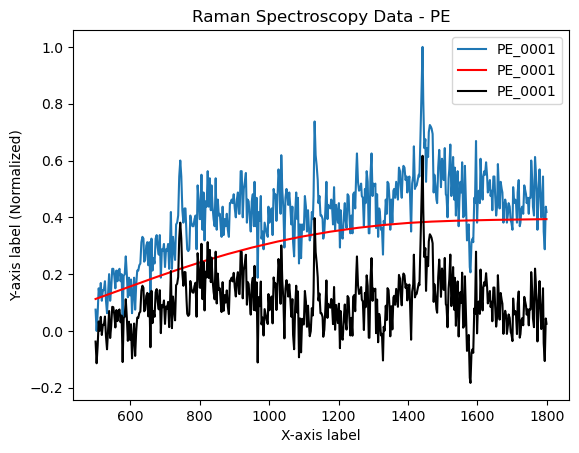

In [4]:
#TESTE COM A BASELINE
#plasticos = ['PE', 'PMMA', 'BLANK', 'PS', 'PTFE', 'PVC']
plasticos = ['PE']
for plastico in plasticos:
    diretorio = 'elementos/Nanoplastics by Raman spectroscopy based on Machine Learning/dataset/' + plastico

    # Initialize lists to store data for the current plastic
    all_PEx, all_PEy = [], []

    for i in range(1, 2, 1):
        numero_arquivo = str(i).zfill(4)
        nome_arquivo = f'{plastico}_{numero_arquivo}.txt'

        # Crie o caminho completo do arquivo
        caminho_arquivo = os.path.join(diretorio, nome_arquivo)

        # Carregue o arquivo usando numpy
        dados = np.loadtxt(caminho_arquivo)
        PEx, PEy = dados[:, 0], dados[:, 1]

        # Normalize the Y-axis values
        PEy_normalized = normalizacao(PEy)

        # Append the data to the lists for the current plastic
        all_PEx.append(PEx)
        
        estimated_baselined = baseline_als(PEy_normalized, l, p)
        baselined_spectrum = PEy_normalized - estimated_baselined
        all_PEy.append(PEy_normalized)

    # Plot all the data for the current plastic on the same graph
    #for PEx, PEy in zip(all_PEx, all_PEy):
        plt.plot(PEx, PEy_normalized, label=f'{plastico}_{numero_arquivo}')
        plt.plot(PEx, estimated_baselined, color='red', label=f'{plastico}_{numero_arquivo}')
        plt.plot(PEx, baselined_spectrum, color='black', label=f'{plastico}_{numero_arquivo}')

    # Set labels and title
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label (Normalized)')
    plt.title(f'Raman Spectroscopy Data - {plastico}')

    # Show legend
    plt.legend()

    # Display the plot for the current plastic
    plt.show()


In [10]:
#TESTE COM A BASELINE
#plasticos = ['PE', 'PMMA', 'BLANK', 'PS', 'PTFE', 'PVC']
plasticos = ['PE']
for plastico in plasticos:
    diretorio = 'elementos/Nanoplastics by Raman spectroscopy based on Machine Learning/dataset/' + plastico

    # Initialize lists to store data for the current plastic
    all_PEx, all_PEy = [], []

    for i in range(1, 2, 1):
        numero_arquivo = str(i).zfill(4)
        nome_arquivo = f'{plastico}_{numero_arquivo}.txt'

        # Crie o caminho completo do arquivo
        caminho_arquivo = os.path.join(diretorio, nome_arquivo)

        # Carregue o arquivo usando numpy
        dados = np.loadtxt(caminho_arquivo)
        PEx, PEy = dados[:, 0], dados[:, 1]

        # Normalize the Y-axis values
        PEy_normalized = normalizacao(PEy)

        # Append the data to the lists for the current plastic
        all_PEx.append(PEx)
        
        estimated_baselined = baseline_als(PEy_normalized, l, p)
        baselined_spectrum = PEy_normalized - estimated_baselined
        #all_PEy.append( baselined_spectrum)
        
        # Continuação do ajuste de ruído
        x_arr = PEx
        nn = len(x_arr)
        A = baselined_spectrum
        dx = x_arr[1] - x_arr[0]

        # Green function
        mat = x_arr[:, np.newaxis] - x_arr[np.newaxis, :]
        G = 0.5 * np.abs(mat) * dx

        # Inversão de G com regularização beta
        beta = -0.2
        mm = np.linalg.inv(G + beta * np.identity(nn))
        D2A_smooth = np.dot(mm, A)

        # Agora D2A_smooth contém os dados ajustados com a inversão de G com regularização
        all_PEy.append(D2A_smooth)

(0.0, 1.0)

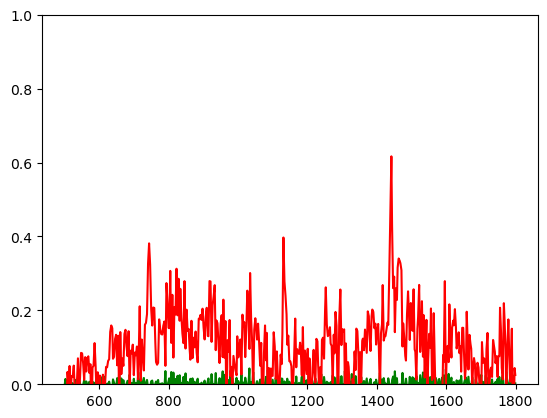

In [14]:
plt.plot(PEx, D2A_smooth, label='Dados Ajustados', color='green')
plt.plot(PEx, baselined_spectrum, label='Linha de Base Corrigida', color='red')

plt.ylim(0,1)

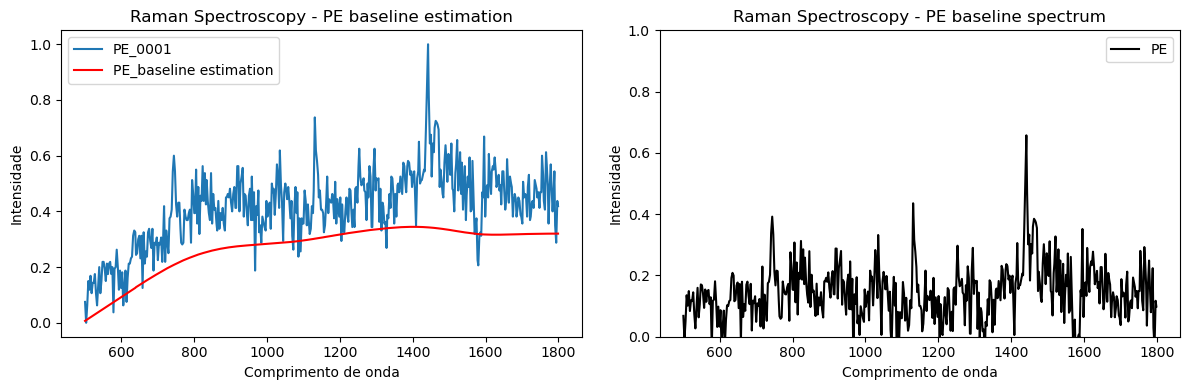

In [89]:
#COMPARAÇÃO BASELINE
import os
import numpy as np
import matplotlib.pyplot as plt

# Defina suas funções normalizacao e baseline_als aqui, se não estiverem já definidas

# Suponha que l e p são parâmetros definidos anteriormente
l, p = 1e5, 0.01

plasticos = ['PE']

for plastico in plasticos:
    diretorio = 'elementos/Nanoplastics by Raman spectroscopy based on Machine Learning/dataset/' + plastico

    # Inicialize listas para armazenar dados para o plástico atual
    all_PEx, all_PEy = [], []

    # Configure a estrutura de subplot com 1 linha e 2 colunas
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    for i in range(1, 2):  # Ajustei para gerar dois gráficos
        numero_arquivo = str(i).zfill(4)
        nome_arquivo = f'{plastico}_{numero_arquivo}.txt'

        # Crie o caminho completo do arquivo
        caminho_arquivo = os.path.join(diretorio, nome_arquivo)

        # Carregue o arquivo usando numpy
        dados = np.loadtxt(caminho_arquivo)
        PEx, PEy = dados[:, 0], dados[:, 1]

        # Normalize os valores do eixo Y
        PEy_normalized = normalizacao(PEy)

        # Anexe os dados às listas para o plástico atual
        all_PEx.append(PEx)

        estimated_baselined = baseline_als(PEy_normalized, l, p)
        baselined_spectrum = PEy_normalized - estimated_baselined
        all_PEy.append(PEy_normalized)

        # Plote os dados no gráfico à esquerda
        axs[0].plot(PEx, PEy_normalized, label=f'{plastico}_{numero_arquivo}')
        axs[0].plot(PEx, estimated_baselined, color='red', label=f'{plastico}_baseline estimation')

        # Plote os dados no gráfico à direita
        axs[1].plot(PEx, baselined_spectrum, color='black', label=f'{plastico}')

    # Configurar rótulos e título
    axs[0].set(xlabel='Comprimento de onda', ylabel='Intensidade', title=f'Raman Spectroscopy - {plastico} baseline estimation')
    axs[1].set(xlabel='Comprimento de onda', ylabel='Intensidade', title=f'Raman Spectroscopy - {plastico} baseline spectrum')

    # Mostrar legenda
    axs[0].legend()
    axs[1].legend()

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()
    plt.ylim(0,1)

    # Exibir os gráficos para o plástico atual
    
    plt.savefig('graficoPE.png')
    plt.show()

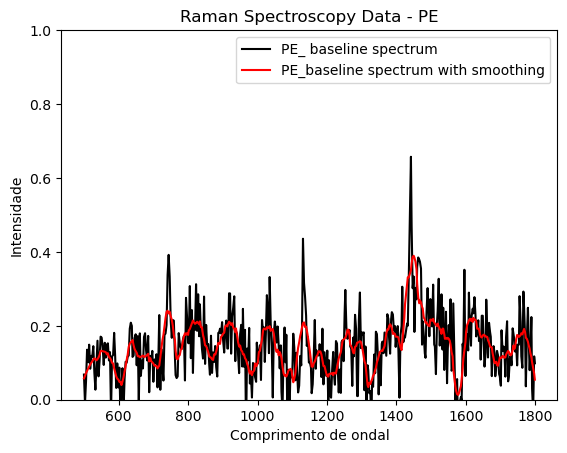

In [102]:
#TESTE DE RUÍDO, USAR DERIVAÇÃO
#plasticos = ['PE', 'PMMA', 'BLANK', 'PS', 'PTFE', 'PVC']
plasticos = ['PE']

for plastico in plasticos:
    diretorio = 'elementos/Nanoplastics by Raman spectroscopy based on Machine Learning/dataset/' + plastico

    # Initialize lists to store data for the current plastic
    all_PEx, all_PEy = [], []

    for i in range(1, 2, 1):
        numero_arquivo = str(i).zfill(4)
        nome_arquivo = f'{plastico}_{numero_arquivo}.txt'

        # Crie o caminho completo do arquivo
        caminho_arquivo = os.path.join(diretorio, nome_arquivo)

        # Carregue o arquivo usando numpy
        dados = np.loadtxt(caminho_arquivo)
        PEx, PEy = dados[:, 0], dados[:, 1]

        # Append the data to the lists for the current plastic
        all_PEx.append(PEx)
        
        # Normalize the Y-axis values
        PEy_normalized = normalizacao(PEy)
        
        estimated_baselined = baseline_als(PEy_normalized, l, p)
        baselined_spectrum = PEy_normalized - estimated_baselined
        
        
        
        y_smooth = signal.savgol_filter(baselined_spectrum, window_length=20, polyorder=2)
        
        

        all_PEy.append(y_smooth)

        # Plot the data for the current plastic and file on the same graph
        
        plt.plot(PEx, baselined_spectrum, c='black', label=f'{plastico}_ baseline spectrum')
        plt.plot(PEx, y_smooth, c='red', label=f'{plastico}_baseline spectrum with smoothing')

    # Set labels and title
    plt.xlabel('Comprimento de ondal')
    plt.ylabel('Intensidade')
    plt.title(f'Raman Spectroscopy Data - {plastico}')

    # Show legend
    plt.legend()
    plt.ylim(0,1)

    # Display the plot for the current plastic
    
    plt.savefig('graficoPE2.png')
    plt.show()


In [ ]:
#fft 

In [104]:
#GERAÇAO DE NOVOS ARQUIVOS .TXT COM A CORREÇÃO FEITA, CUIDADO!!
plasticos = ['PE', 'PMMA', 'BLANK', 'PS', 'PTFE', 'PVC']

for plastico in plasticos:
    diretorio = 'elementos/Nanoplastics by Raman spectroscopy based on Machine Learning/dataset/' + plastico
    output_directory = 'elementos/Nanoplastics by Raman spectroscopy based on Machine Learning/dataset/output/'
    
    plastico_output_directory = os.path.join(output_directory, plastico)
    os.makedirs(plastico_output_directory, exist_ok=True)

    for i in range(1, 201, 1):
        numero_arquivo = str(i).zfill(4)
        nome_arquivo = f'{plastico}_{numero_arquivo}.txt'

        # Crie o caminho completo do arquivo
        caminho_arquivo = os.path.join(diretorio, nome_arquivo)

        # Carregue o arquivo usando numpy
        dados = np.loadtxt(caminho_arquivo)
        PEx, PEy = dados[:, 0], dados[:, 1]

        # Normalize the Y-axis values
        PEy_normalized = normalizacao(PEy)

        estimated_baselined = baseline_als(PEy_normalized, l, p)
        baselined_spectrum = PEy_normalized - estimated_baselined
        y_smooth = signal.savgol_filter(baselined_spectrum, window_length=10, polyorder=3)

        # Salvar os dados para cada arquivo individualmente
        output_file = os.path.join(plastico_output_directory, f'{plastico}_{numero_arquivo}_processed.txt')
        np.savetxt(output_file, np.column_stack((PEx, y_smooth)), delimiter='\t', header='X-axis\tProcessed_Y-axis', comments='')

        # Limpar as listas para evitar acumulação de dados
        all_PEx, all_PEy = [], []


In [9]:
#ESPECTROS 'MICROPLASTICS'
plasticos = ['NC', 'PA', 'PC', 'PE', 'PET', 'PP', 'PS', 'PVC']

for plastico in plasticos:
    diretorio = 'c:/Users/Andreia/Jupyter/TCC/elementos/microplastics weathered under natural environments/dataset/' + plastico
    output_directory = 'c:/Users/Andreia/Jupyter/TCC/elementos/microplastics weathered under natural environments/dataset/output/'
    
    for plastico in plasticos:
        output_plastico_directory = os.path.join(output_directory, plastico)
        os.makedirs(output_plastico_directory, exist_ok=True)

        for arquivo in os.listdir(diretorio):
            caminho_arquivo = os.path.join(diretorio, arquivo)
            if os.path.isfile(caminho_arquivo):  # Verifica se é um arquivo
                # Carregue o arquivo usando numpy
                dados = np.loadtxt(caminho_arquivo)
                PEx, PEy = dados[:, 0], dados[:, 1]

                # Normalize os valores do eixo y
                PEy_normalized = normalizacao(PEy)

                # Remova a linha de base
                estimated_baselined = baseline_als(PEy_normalized, l, p)
                baselined_spectrum = PEy_normalized - estimated_baselined

                # Suavize os dados
                y_smooth = signal.savgol_filter(baselined_spectrum, window_length=10, polyorder=3)

                # Salve os dados processados
                nome_arquivo_saida = f'{plastico}_{os.path.splitext(arquivo)[0]}_processed.txt'
                caminho_arquivo_saida = os.path.join(output_plastico_directory, nome_arquivo_saida)
                np.savetxt(caminho_arquivo_saida, np.column_stack((PEx, y_smooth)), delimiter='\t', header='X-axis\tProcessed_Y-axis', comments='')